<a href="https://colab.research.google.com/github/dhyatt4198/CS4410-_Homework/blob/main/CS4410_Homework2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1: Loading the Dataset

In [41]:
import pandas as pd

df = pd.read_csv("diabetes.tab.txt", delimiter="\t")

n_samples, n_features = df.shape

target_col = df.columns[-1]
feature_names = df.columns[:-1].tolist()
target_names = df[target_col].unique()

description = f"""
Dataset Description
-------------------
Number of samples: {n_samples}
Number of features: {n_features - 1}
Number of targets: {len(target_names)}
Feature names: {feature_names}
Target column: {target_col}
Target classes: {target_names}
"""

print(description)



Dataset Description
-------------------
Number of samples: 442
Number of features: 10
Number of targets: 214
Feature names: ['AGE', 'SEX', 'BMI', 'BP', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6']
Target column: Y
Target classes: [151  75 141 206 135  97 138  63 110 310 101  69 179 185 118 171 166 144
 168  68  49 245 184 202 137  85 131 283 129  59 341  87  65 102 265 276
 252  90 100  55  61  92 259  53 190 142 155 225 104 182 128  52  37 170
  71 163 150 160 178  48 270 111  42 200 113 143  51 210 134  98 164  96
 162 279  83 302 198  95 232  81 246 297 258 229 275 281 173 180  84 121
 161  99 109 115 268 274 158 107 103 272 280 336 317 235  60 174 126 288
  88 292 197 186  25 195 217 172 214  70 220 152  47  74 295 127 237  64
  79  91 116  86 122  72  39 196 222 277  77 191  73 263 248 296  78  93
 208 108 154 124  67 257 262 177 187 125 215 303 243 153 346  89  50 308
 145  45 264 241  66  94 230 181 156 233 219  80 332  31 236 253  44 114
 147 242 249 192 244 199 306 216 139 148  54 221

# Step 2: Exploring the Data with a Pandas

In [42]:
import pandas as pd

pd.set_option("display.precision", 4)

df = pd.read_csv("diabetes.tab.txt", delimiter="\t")
df

print("First 5 Rows of the Dataset:")
print(df.head())

print("\nSummary Statistics:")
print(df.describe(include="all"))

First 5 Rows of the Dataset:
   AGE  SEX   BMI     BP   S1     S2    S3   S4      S5  S6    Y
0   59    2  32.1  101.0  157   93.2  38.0  4.0  4.8598  87  151
1   48    1  21.6   87.0  183  103.2  70.0  3.0  3.8918  69   75
2   72    2  30.5   93.0  156   93.6  41.0  4.0  4.6728  85  141
3   24    1  25.3   84.0  198  131.4  40.0  5.0  4.8903  89  206
4   50    1  23.0  101.0  192  125.4  52.0  4.0  4.2905  80  135

Summary Statistics:
            AGE       SEX       BMI        BP        S1        S2        S3  \
count  442.0000  442.0000  442.0000  442.0000  442.0000  442.0000  442.0000   
mean    48.5181    1.4683   26.3758   94.6470  189.1403  115.4391   49.7885   
std     13.1090    0.4996    4.4181   13.8313   34.6081   30.4131   12.9342   
min     19.0000    1.0000   18.0000   62.0000   97.0000   41.6000   22.0000   
25%     38.2500    1.0000   23.2000   84.0000  164.2500   96.0500   40.2500   
50%     50.0000    1.0000   25.7000   93.0000  186.0000  113.0000   48.0000   
75%    

# Step 3: Visualizing the Features

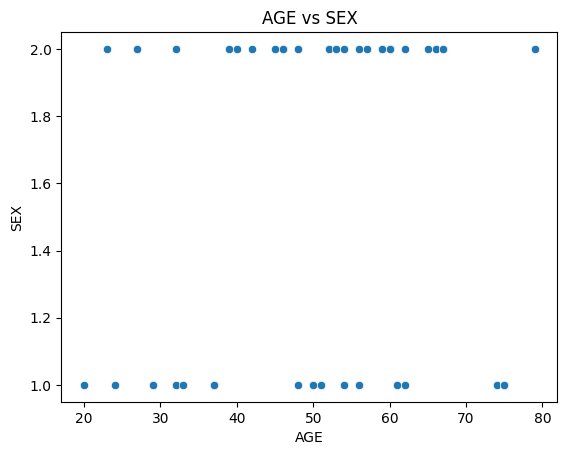

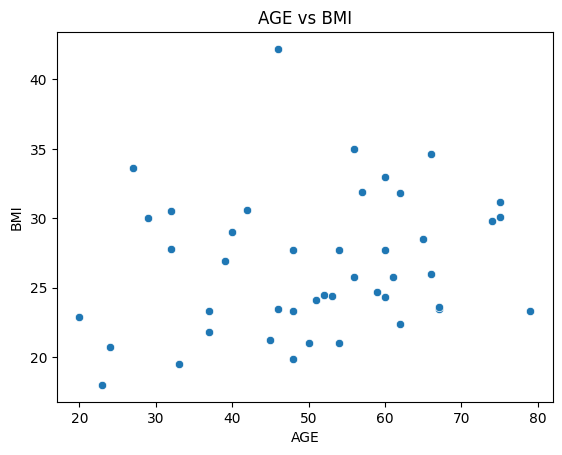

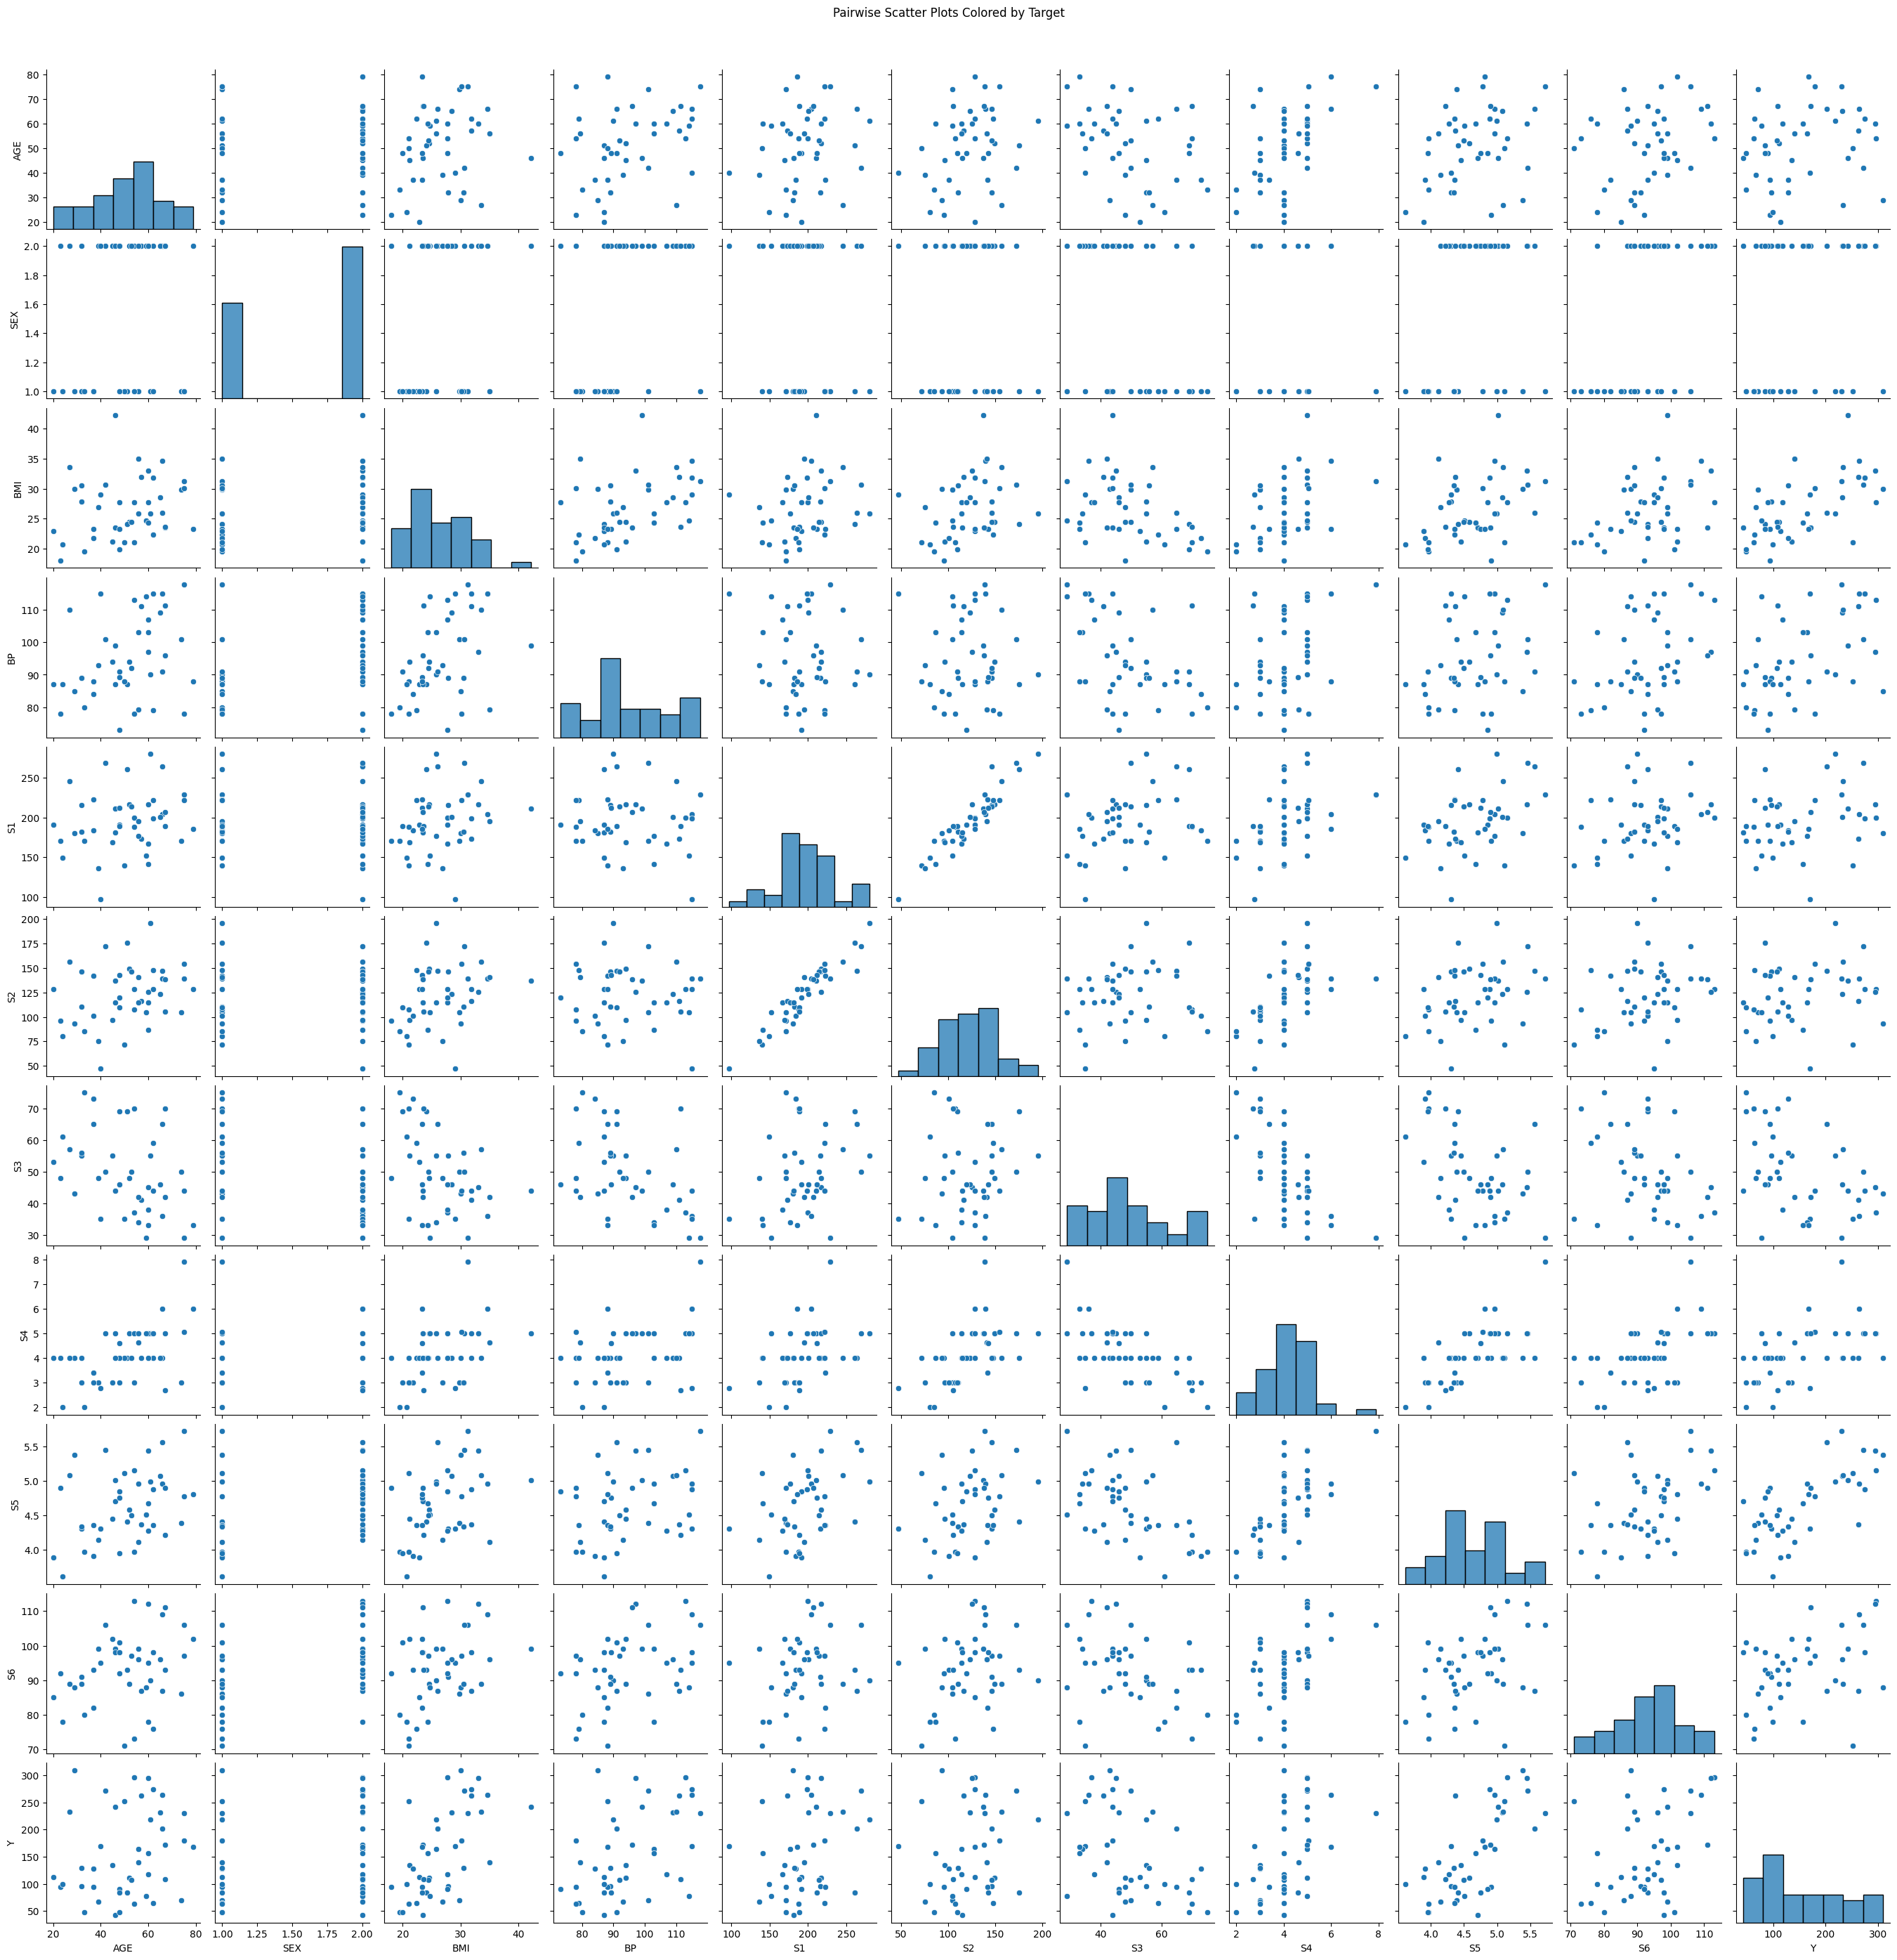

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

df_sample = df.sample(frac=0.1, random_state=42)

sns.scatterplot(data=df_sample, x=df.columns[0], y=df.columns[1])
plt.title(f"{df.columns[0]} vs {df.columns[1]}")
plt.show()

sns.scatterplot(data=df_sample, x=df.columns[0], y=df.columns[2])
plt.title(f"{df.columns[0]} vs {df.columns[2]}")
plt.show()

sns.pairplot(df_sample, diag_kind="hist")
plt.suptitle("Pairwise Scatter Plots Colored by Target", y=1.02)
plt.show()


# Step 4: Splitting the Data for Training and Testing

In [44]:
from sklearn.model_selection import train_test_split
import pandas as pd


# Create a simple object to mimic scikit-learn dataset structure
class DiabetesDataset:
    def __init__(self, dataframe):
        self.data = dataframe.drop('Y', axis=1)
        self.target = dataframe['Y']

# Instantiate the custom dataset object
diabetes_dataset = DiabetesDataset(df)

X_train, X_test, y_train, y_test = train_test_split(
    diabetes_dataset.data, diabetes_dataset.target, random_state=11)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (331, 10)
Shape of X_test: (111, 10)
Shape of y_train: (331,)
Shape of y_test: (111,)


# Step 5: Training the Model

In [45]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)

# Get feature names from the original DataFrame excluding the target column
used_feature_names = df.drop(columns=[target_col]).columns.tolist()

print("Intercept:", linear_regression.intercept_)
print("\nCoefficients:")
for name, coef in zip(used_feature_names, linear_regression.coef_):
    print(f"  {name}: {coef:.6f}")

Intercept: -249.0310514413584

Coefficients:
  AGE: -0.218751
  SEX: -25.399154
  BMI: 5.637641
  BP: 1.069052
  S1: -0.462542
  S2: 0.215038
  S3: -0.482807
  S4: -0.042408
  S5: 56.729010
  S6: 0.250459


# Step 6:  Testing the Model

In [46]:
predicted = linear_regression.predict(X_test)

expected = y_test

predicted[:5]  # first 5 predictions

expected[:5]   # first five targets


,Y
189,79
294,55
318,109
146,178
201,39


#Step 7: Visualizing the Expected vs. Predicted Prices

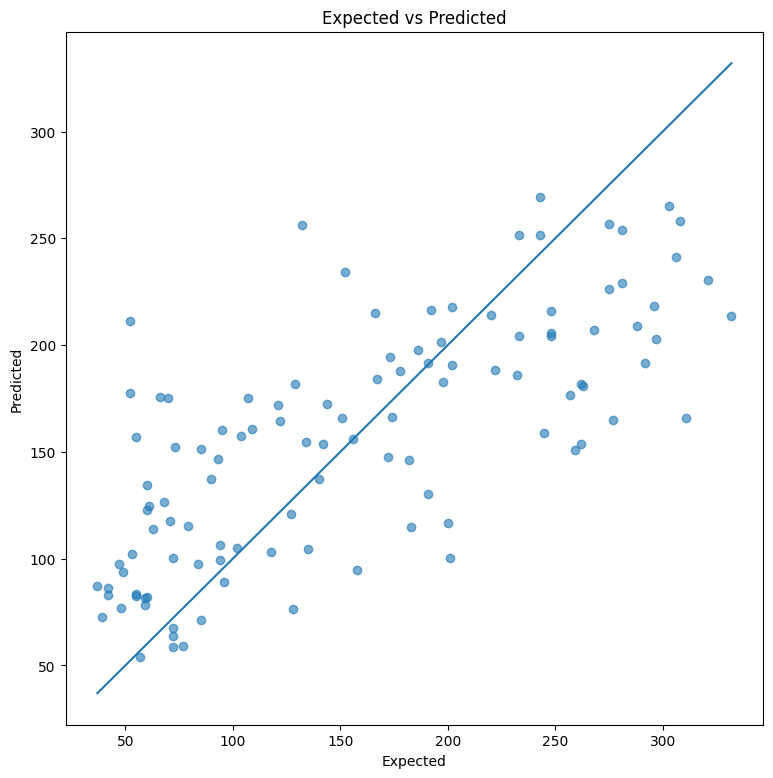

In [47]:
import matplotlib.pyplot as plt

y_pred = predicted

plt.figure(figsize=(9,9))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([min(y_test), max(y_test)],
         [min(y_test), max(y_test)])
plt.xlabel("Expected")
plt.ylabel("Predicted")
plt.title("Expected vs Predicted")
plt.show()


# Step 8: Regression Model Metrics

In [48]:
from sklearn import metrics
import numpy as np

r2  = metrics.r2_score(y_test, y_pred)

print(f"R^2:  {r2:.4f}")

R^2:  0.5322


# Step 9: Choosing the Best Model

In [49]:
from sklearn.linear_model import ElasticNet, Lasso, Ridge
from sklearn.model_selection import KFold, cross_val_score

estimators = {
    'LinearRegression': LinearRegression(),
    'ElasticNet': ElasticNet(),
    'Lasso': Lasso(),
    'Ridge': Ridge()}

kfold = KFold(n_splits=10, random_state=11, shuffle=True)

for name, est in estimators.items():
    scores = cross_val_score(estimator=est, X=X, y=y, cv=kfold, scoring='r2')
    print(f"{name:>16}: mean of r2 scores={scores.mean():.3f}")


LinearRegression: mean of r2 scores=0.475
      ElasticNet: mean of r2 scores=0.452
           Lasso: mean of r2 scores=0.471
           Ridge: mean of r2 scores=0.475
